In [1]:
import pycaret
import numpy as np
from pathlib import Path
import pandas as pd

In [2]:
from pycaret.classification import *

In [3]:
# check pycaret version 
pycaret.__version__

'3.3.2'

In [4]:
data_path = Path("../Titanic_data/train.csv")

data = pd.read_csv(data_path)

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data['Cabin'].sort_values()[100:]

505    C65
581    C68
698    C68
318     C7
550    C70
      ... 
884    NaN
885    NaN
886    NaN
888    NaN
890    NaN
Name: Cabin, Length: 791, dtype: object

In [7]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()


In [8]:
# init setup on exp
exp.setup(data, target = 'Survived', 
          session_id = 108,
          ignore_features = ['PassengerId', 'Name', 'Cabin', 'Ticket'])


,Description,Value
0,Session id,108
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 10)"
5,Transformed train set shape,"(623, 10)"
6,Transformed test set shape,"(268, 10)"
7,Ignore features,4
8,Numeric features,5
9,Categorical features,2


In [9]:
# compare models 
best_model = exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8154,0.8595,0.7290,0.7820,0.7511,0.6051,0.6096,0.0050
rf,Random Forest Classifier,0.8137,0.8748,0.7536,0.7668,0.7578,0.6067,0.6092,0.0190
lightgbm,Light Gradient Boosting Machine,0.8137,0.8741,0.7455,0.7704,0.7553,0.6052,0.6080,0.2110
ridge,Ridge Classifier,0.8122,0.8598,0.7207,0.7794,0.7457,0.5976,0.6020,0.0070
et,Extra Trees Classifier,0.8089,0.8513,0.7495,0.7562,0.7506,0.5959,0.5983,0.0170
lr,Logistic Regression,0.8042,0.8607,0.7163,0.7622,0.7362,0.5812,0.5843,0.2600
gbc,Gradient Boosting Classifier,0.8010,0.8730,0.6991,0.7692,0.7293,0.5729,0.5774,0.0120
ada,Ada Boost Classifier,0.7897,0.8366,0.7583,0.7150,0.7325,0.5600,0.5652,0.0100
nb,Naive Bayes,0.7817,0.8285,0.6906,0.7338,0.7055,0.5333,0.5390,0.0050
dt,Decision Tree Classifier,0.7704,0.7646,0.7156,0.7011,0.7055,0.5179,0.5206,0.0050


In [15]:
leaderboard = exp.pull()

In [16]:
leaderboard

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8154,0.8595,0.7290,0.7820,0.7511,0.6051,0.6096,0.005
rf,Random Forest Classifier,0.8137,0.8748,0.7536,0.7668,0.7578,0.6067,0.6092,0.019
lightgbm,Light Gradient Boosting Machine,0.8137,0.8741,0.7455,0.7704,0.7553,0.6052,0.6080,0.211
ridge,Ridge Classifier,0.8122,0.8598,0.7207,0.7794,0.7457,0.5976,0.6020,0.007
et,Extra Trees Classifier,0.8089,0.8513,0.7495,0.7562,0.7506,0.5959,0.5983,0.017
lr,Logistic Regression,0.8042,0.8607,0.7163,0.7622,0.7362,0.5812,0.5843,0.260
gbc,Gradient Boosting Classifier,0.8010,0.8730,0.6991,0.7692,0.7293,0.5729,0.5774,0.012
ada,Ada Boost Classifier,0.7897,0.8366,0.7583,0.7150,0.7325,0.5600,0.5652,0.010
nb,Naive Bayes,0.7817,0.8285,0.6906,0.7338,0.7055,0.5333,0.5390,0.005
dt,Decision Tree Classifier,0.7704,0.7646,0.7156,0.7011,0.7055,0.5179,0.5206,0.005


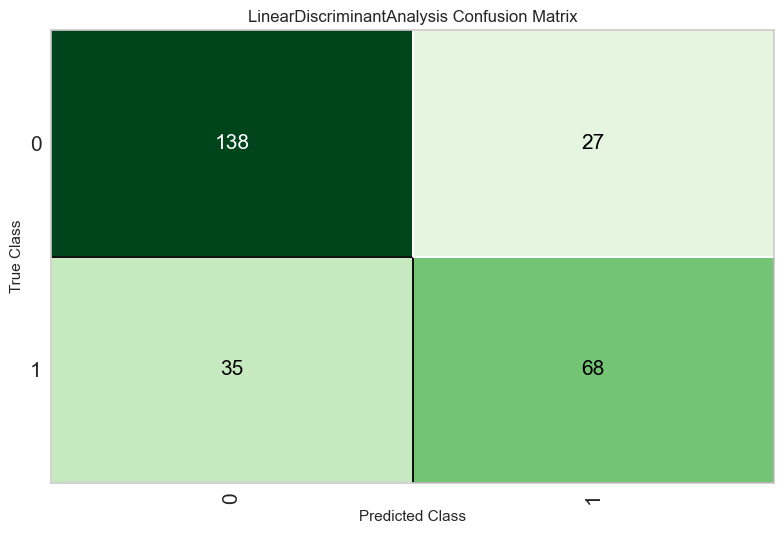

In [10]:
exp.plot_model(best_model, plot = 'confusion_matrix')

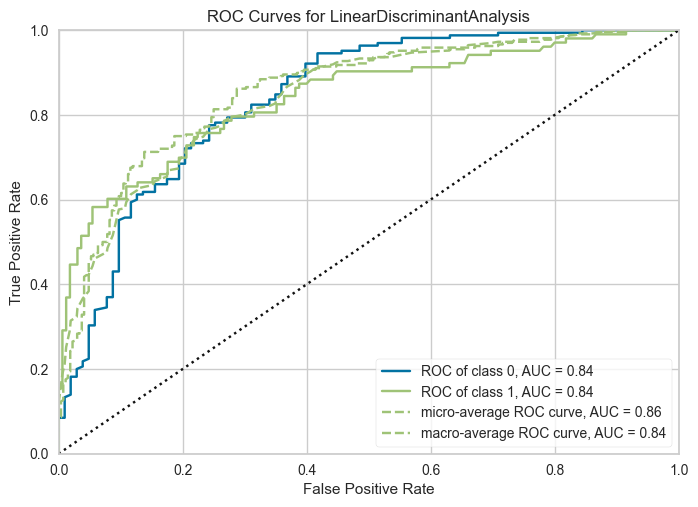

In [11]:
exp.plot_model(best_model, plot = 'auc', verbose=False)

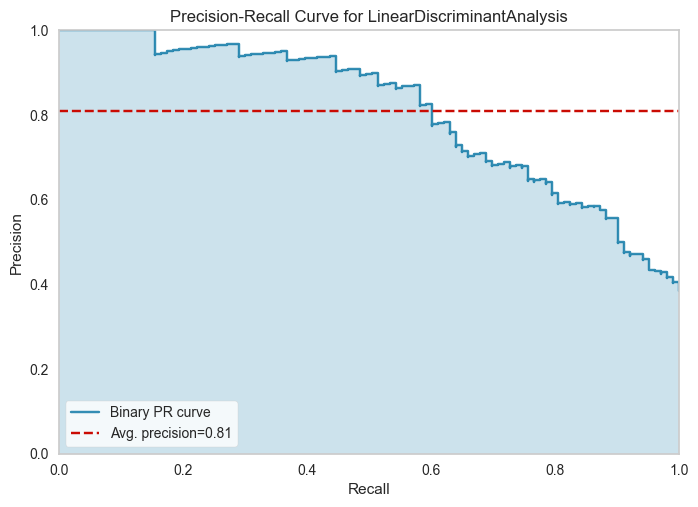

In [12]:
exp.plot_model(best_model, plot='pr', verbose=False)

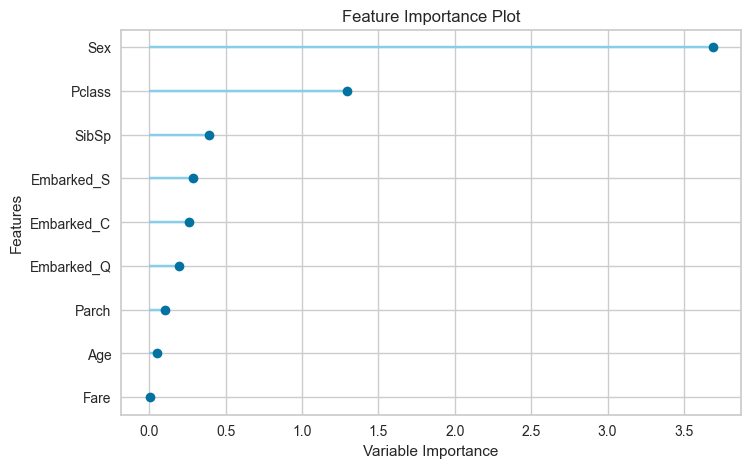

In [13]:
exp.plot_model(best_model, plot='feature', verbose=False)